In [18]:
from keras.models import Sequential
from keras.layers import Dense
import ehtim as eh
import numpy as np

# visibilities
INPUT_SIZE = 1030
# pixels in image
OUTPUT_SIZE = 784

In [19]:
IM = eh.image.load_txt('../models/avery_sgra_eofn.txt');
IM = IM.resample_square(28)

def displayImage(arr):
    """Displays image given a flattened array of pixels."""
    IM.imvec = arr
    IM.display()

Loading text image:  ../models/avery_sgra_eofn.txt


In [24]:
def getData(start, end):
    """Reads in visibilities and image from [start, end)."""
    n = end - start
    x, y = np.empty([n, INPUT_SIZE]), np.empty([n, OUTPUT_SIZE])
    for i in range(n):
        obs = eh.obsdata.load_uvfits('inputs/obs{0}.fits'.format(start + i))
        im = eh.image.load_fits('outputs/img{0}.fits'.format(start + i))
        x[i] = obs.data['vis']
        y[i] = im.imvec
    return x, y

In [ ]:
# Neural Net
x_train, y_train = getData(0, 1000);
model = Sequential()
model.add(Dense(32, input_dim=INPUT_SIZE, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(OUTPUT_SIZE))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=32)

Loading uvfits:  inputs/obs0.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img0.fits
Loading uvfits:  inputs/obs1.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img1.fits
Loading uvfits:  inputs/obs2.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img2.fits
Loading uvfits:  inputs/obs3.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img3.fits
Loading uvfits:  inputs/obs4.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img4.fits
Loading uvfits:  inputs/obs5.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img5.fits
Loading uvfits:  inputs/obs6.fits
no IF in uvfits he

no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img52.fits
Loading uvfits:  inputs/obs53.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img53.fits
Loading uvfits:  inputs/obs54.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img54.fits
Loading uvfits:  inputs/obs55.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img55.fits
Loading uvfits:  inputs/obs56.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img56.fits
Loading uvfits:  inputs/obs57.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img57.fits
Loading uvfits:  inputs/obs58.fits
no IF in uvfits header!
POLREP_UVFITS: c

no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img104.fits
Loading uvfits:  inputs/obs105.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img105.fits
Loading uvfits:  inputs/obs106.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img106.fits
Loading uvfits:  inputs/obs107.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img107.fits
Loading uvfits:  inputs/obs108.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img108.fits
Loading uvfits:  inputs/obs109.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img109.fits
Loading uvfits:  inputs/obs110.fits
no IF in uvfits header!
POLR

no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img155.fits
Loading uvfits:  inputs/obs156.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img156.fits
Loading uvfits:  inputs/obs157.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img157.fits
Loading uvfits:  inputs/obs158.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img158.fits
Loading uvfits:  inputs/obs159.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img159.fits
Loading uvfits:  inputs/obs160.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img160.fits
Loading uvfits:  inputs/obs161.fits
no IF in uvfits header!
POLR

no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img206.fits
Loading uvfits:  inputs/obs207.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img207.fits
Loading uvfits:  inputs/obs208.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img208.fits
Loading uvfits:  inputs/obs209.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img209.fits
Loading uvfits:  inputs/obs210.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img210.fits
Loading uvfits:  inputs/obs211.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img211.fits
Loading uvfits:  inputs/obs212.fits
no IF in uvfits header!
POLR

Loading fits image:  outputs/img258.fits
Loading uvfits:  inputs/obs259.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img259.fits
Loading uvfits:  inputs/obs260.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img260.fits
Loading uvfits:  inputs/obs261.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img261.fits
Loading uvfits:  inputs/obs262.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img262.fits
Loading uvfits:  inputs/obs263.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img263.fits
Loading uvfits:  inputs/obs264.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs

Loading uvfits:  inputs/obs10.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img10.fits
Loading uvfits:  inputs/obs11.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img11.fits
Loading uvfits:  inputs/obs12.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img12.fits
Loading uvfits:  inputs/obs13.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img13.fits
Loading uvfits:  inputs/obs14.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img14.fits
0


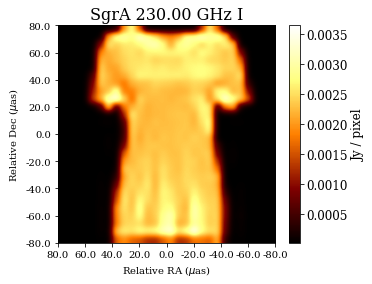

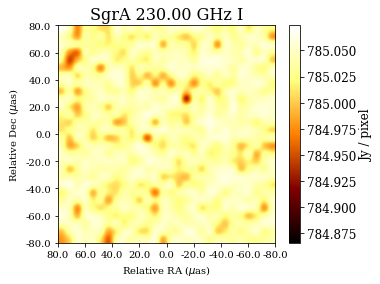

1


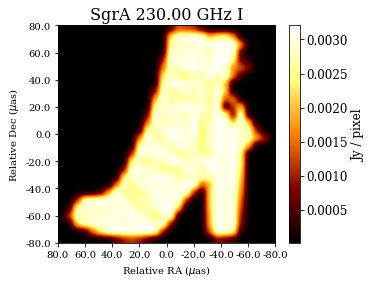

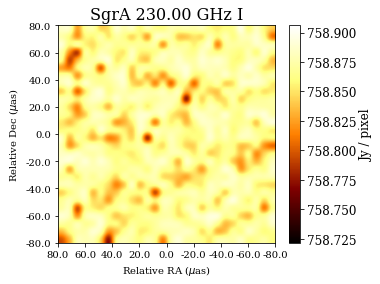

2


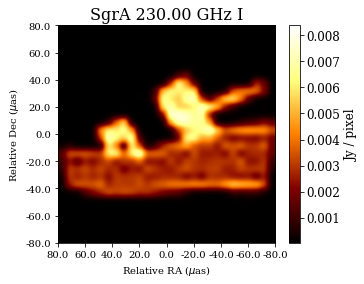

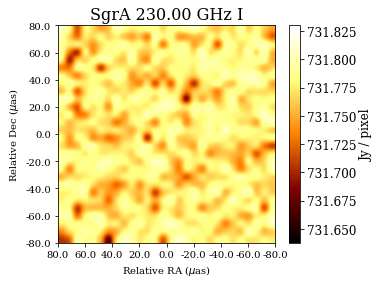

3


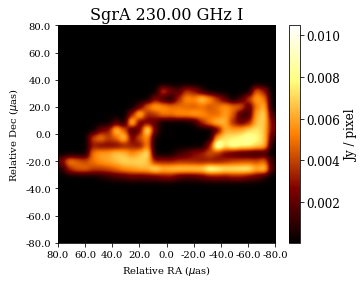

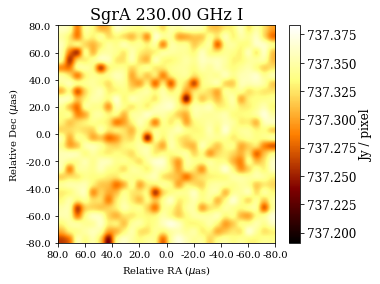

4


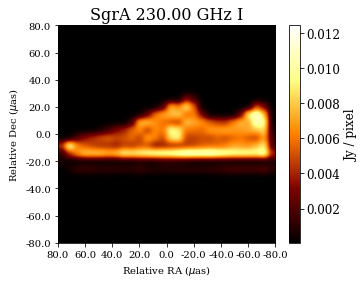

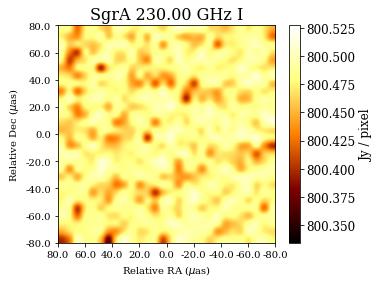

In [17]:
# Visualize predictions vs actual
x_test, y_test = getData(10, 15)
y_predict = model.predict(x_test)
for i in range(5):
    print(i)
    displayImage(y_test[i])
    displayImage(y_predict[i])